<a href="https://colab.research.google.com/github/omarguerra/University-Malaya/blob/master/Shooting_method_for_Linear_BVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

i= 0 x= 0.1250 U= 0.68175966
i= 1 x= 0.2500 U= 0.35808031
i= 2 x= 0.3750 U= 0.04905991
i= 3 x= 0.5000 U= -0.22971410
i= 4 x= 0.6250 U= -0.46971580
i= 5 x= 0.7500 U= -0.67097067
i= 6 x= 0.8750 U= -0.84225855
i= 7 x= 1.0000 U= -1.00000000




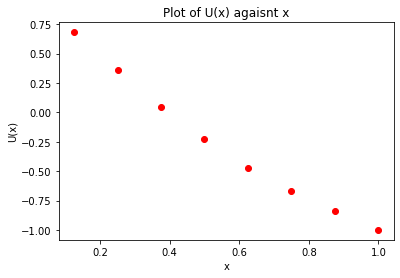

In [ ]:
import numpy as np
import matplotlib.pyplot as mpl
import pandas as pd

#The problem considers a linear BVP -u"+ (pi)^2u = 2(pi)^2cos(pi*x) 0<= x <=1 where u(a=0)= 1 and u(b=1)= -1
#define all the functions transformed from 2nd order to 1st order ODE
#This case f1=y'1, f2=y'2, ... and so on
def f1(x,y1,y2):
    return y2

def f2(x,y1,y2):
    return (np.pi**2*y1)-(2*(np.pi**2)*np.cos(np.pi*x))

def f3(x,y3,y4):
    return y4

def f4(x,y3,y4):
    return (np.pi**2*y3)

#-------------------------------------------------------------------------------------------------------------
#The first loop is created to determine the boundaries y1(b) and y3(b)

# The initial boundaries at y1(a), y2(a), ... and so on
y1 = 1.0
y2 = 0.0
y3 = 0.0
y4 = 1.0
beta = -1.0
#Beta is the last value of the shoot, where u(b)=beta, it is given u(1)=-1, so beta=-1
#Declaring all the parameters to perform algorithm
N = 8
x = 0.0
h =  1/N

#Runge-kutta 4 calculation to obtain y1(b) and y3(b) as y1n and y3n respectivily
for i in range(0,N):
    K11 = h*f1(x,y1,y2)
    K12 = h*f2(x,y1,y2)
    K13 = h*f3(x,y3,y4)
    K14 = h*f4(x,y3,y4)

    K21 = h*f1(x+0.5*h, y1+0.5*K11, y2+0.5*K12)
    K22 = h*f2(x+0.5*h, y1+0.5*K11, y2+0.5*K12)
    K23 = h*f3(x+0.5*h, y3+0.5*K13, y2+0.5*K14)
    K24 = h*f4(x+0.5*h, y3+0.5*K13, y2+0.5*K14)

    K31 = h*f1(x+0.5*h, y1+0.5*K21, y2+0.5*K22)
    K32 = h*f2(x+0.5*h, y1+0.5*K21, y2+0.5*K22)
    K33 = h*f3(x+0.5*h, y3+0.5*K23, y2+0.5*K24)
    K34 = h*f4(x+0.5*h, y3+0.5*K23, y2+0.5*K24)

    K41 = h*f1(x+h, y1+K31, y2+K32)
    K42 = h*f2(x+h, y1+K31, y2+K32)
    K43 = h*f3(x+h, y3+K33, y2+K34)
    K44 = h*f3(x+h, y3+K33, y2+K34)

    y11 = (y1 + (K11+2*K21+2*K31+K41)/6.0)
    y22 = (y2 + (K12+2*K22+2*K32+K42)/6.0)
    y33 = (y3 + (K13+2*K23+2*K33+K43)/6.0)
    y44 = (y4 + (K14+2*K24+2*K34+K44)/6.0)

    y1 = y11

    x = x+h
    y3 = y33

# y1n and y3n are the boundaries at b
y1n = y1
y3n = y3

#--------------------------------------------------------------------------------------------------------
#The second loop is to determine the solution of y3, even thought before we got y3=y33
#because we set y3n=y3, if the loop is not runned again, in the linear solution y3 is set to y3n 

# The initial boundaries at y1(a), y2(a), ... and so on
y1 = 1.0
y2 = 0.0
y3 = 0.0
y4 = 1.0

N = 8
x = 0.0
h = 1/N

#Runge-kutta 4 calculation to obtain y3(b)
for i in range(0,N):
    K11 = h*f1(x,y1,y2)
    K12 = h*f2(x,y1,y2)
    K13 = h*f3(x,y3,y4)
    K14 = h*f4(x,y3,y4)

    K21 = h*f1(x+0.5*h, y1+0.5*K11, y2+0.5*K12)
    K22 = h*f2(x+0.5*h, y1+0.5*K11, y2+0.5*K12)
    K23 = h*f3(x+0.5*h, y3+0.5*K13, y2+0.5*K14)
    K24 = h*f4(x+0.5*h, y3+0.5*K13, y2+0.5*K14)

    K31 = h*f1(x+0.5*h, y1+0.5*K21, y2+0.5*K22)
    K32 = h*f2(x+0.5*h, y1+0.5*K21, y2+0.5*K22)
    K33 = h*f3(x+0.5*h, y3+0.5*K23, y2+0.5*K24)
    K34 = h*f4(x+0.5*h, y3+0.5*K23, y2+0.5*K24)

    K41 = h*f1(x+h, y1+K31, y2+K32)
    K42 = h*f2(x+h, y1+K31, y2+K32)
    K43 = h*f3(x+h, y3+K33, y2+K34)
    K44 = h*f3(x+h, y3+K33, y2+K34)

    y11 = (y1 + (K11+2*K21+2*K31+K41)/6.0)
    y22 = (y2 + (K12+2*K22+2*K32+K42)/6.0)
    y33 = (y3 + (K13+2*K23+2*K33+K43)/6.0)
    y44 = (y4 + (K14+2*K24+2*K34+K44)/6.0)
  
    y1 = y11

    x = x+h
    y3 = y33


#The linear solution from eq.1.16
    U = y1 + ((beta-y1n)/y3n)*y3
    mpl.plot(x,U,'--ro')   
    print('i=', i, 'x=',"{:.4f}".format(x), 'U=', "{:.8f}".format(U))

print('\n')
mpl.xlabel('x')
mpl.ylabel('U(x)')
mpl.title('Plot of U(x) agaisnt x')
mpl.show()